In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv",header=None)

In [5]:
df_train.shape

(60000, 785)

In [8]:
28 *28

784

In [9]:
df_train.iloc[10, 1:].values.reshape((28, 28)).shape

(28, 28)

Text(0.5, 1.0, '3')

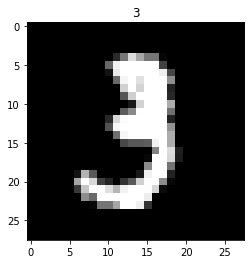

In [12]:
plt.imshow(df_train.iloc[10, 1:].values.reshape((28, 28)), cmap="gray")
plt.title(df_train.iloc[10, 0])

In [4]:
X_train = df_train.iloc[:,1:].values/255.0
X_test = df_test.iloc[:,1:].values/255.0

y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

In [5]:
X_train.shape

(60000, 784)

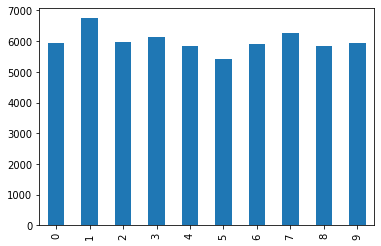

In [6]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [7]:
import numpy as np

In [8]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

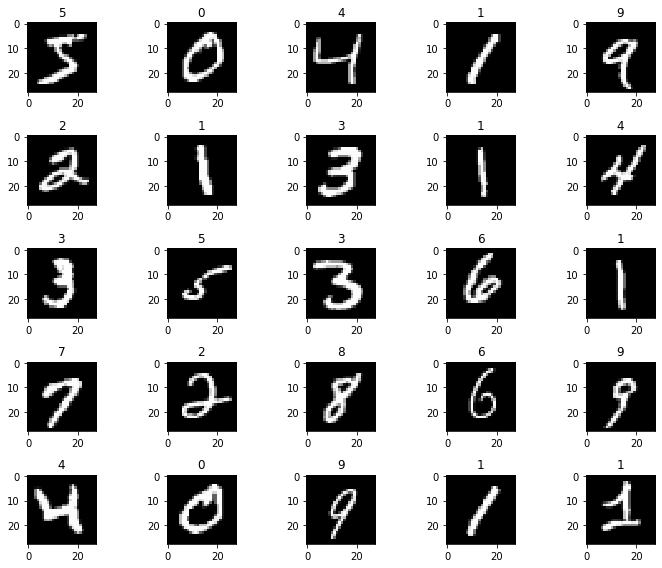

In [9]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

In [10]:
from sklearn import *

In [11]:
est = linear_model.SGDClassifier(n_jobs=8, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)

In [12]:
%%time 
est.fit(X_train, y_train)

CPU times: user 36.4 s, sys: 127 ms, total: 36.5 s
Wall time: 6.65 s


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.15, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=8, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
est.score(X_test, y_test)

0.9081

In [14]:
est.coef_.shape

(10, 784)

In [15]:
X_train.shape

(60000, 784)

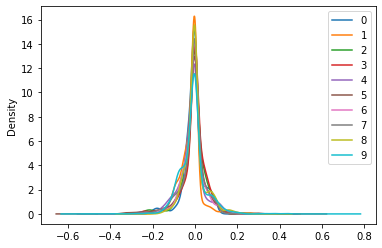

In [19]:
pd.DataFrame(est.coef_.T).plot.density()

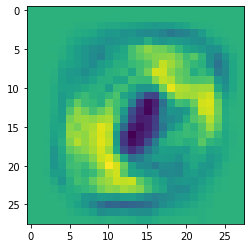

In [21]:
plt.imshow(est.coef_[0].reshape((28,28)))

In [23]:
pd.DataFrame(est.coef_[0].reshape((28,28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000100,0.000063,-0.000284,-0.003348,-0.002990,-0.003620,-0.009190,...,-0.029851,-0.023175,-0.015919,-0.006174,-0.002406,-0.002123,-0.001157,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,-0.000141,-0.000854,-0.003224,-0.007553,-0.010518,-0.013735,-0.027803,...,-0.077984,-0.067351,-0.062999,-0.048972,-0.028883,-0.007614,-0.001691,-0.001303,-0.000295,0.000000
4,0.000000,0.000000,0.000000,-0.000246,-0.000746,-0.008217,-0.017474,-0.025033,-0.028844,-0.038651,...,-0.031076,-0.032857,-0.038697,-0.046240,-0.047228,-0.028127,-0.015111,-0.006557,-0.001290,0.000000
5,0.000000,0.000000,-0.000345,-0.000647,-0.003593,-0.018018,-0.026820,-0.038700,-0.048151,-0.054988,...,0.031179,0.007112,-0.017519,-0.024355,-0.033513,-0.045682,-0.042998,-0.018128,-0.003886,-0.000522
6,0.000000,0.000000,-0.000308,-0.000321,-0.006712,-0.017989,-0.026186,-0.037697,-0.051166,-0.064192,...,0.060624,0.042308,0.016075,0.030879,0.003463,-0.047311,-0.073028,-0.040762,-0.010821,-0.002038
7,0.000000,0.000000,-0.001043,-0.001523,-0.013778,-0.020219,-0.026107,-0.038481,-0.050988,-0.029413,...,0.070795,0.050807,0.022842,0.007383,-0.002499,-0.045464,-0.085291,-0.050780,-0.013729,-0.000747
8,0.000336,0.000000,-0.000360,-0.003907,-0.022314,-0.033559,-0.034950,-0.046625,-0.033807,-0.023287,...,0.058575,0.038377,0.030167,-0.007498,0.007782,-0.009420,-0.071325,-0.056130,-0.015545,-0.002211
9,0.000000,0.000000,0.000201,-0.006144,-0.024466,-0.031113,-0.026994,-0.033906,-0.019626,-0.005742,...,0.078033,0.043196,0.031526,0.023946,0.024322,0.029061,-0.036095,-0.051164,-0.015167,-0.000490


In [30]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [25]:
from tensorflow import keras
import tensorflow as tf

In [33]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(784,)))
model.add(keras.layers.Dense(units=400, activation="relu"))
model.add(keras.layers.Dense(units=100, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="sgd", metrics=["acc"]
              , loss=keras.losses.categorical_crossentropy)
model.summary()

model.fit(X_train, Y_train, validation_data=(X_test, Y_test)
    , epochs = 10, batch_size=64 )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.7960 - acc: 0.7971 - val_loss: 0.3781 - val_acc: 0.8984
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3477 - acc: 0.9039 - val_loss: 0.2956 - val_acc: 0.9181
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample